## Imports

In [53]:
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Plot parameters
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['axes.labelsize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['xtick.major.size'] = 20
matplotlib.rcParams['ytick.major.size'] = 20
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['lines.linewidth'] = 3

In [85]:
def Evidence(p):
    """ Return the log evidence from a given bilby run """
    f = open(p + '/fast_tutorial_result.json')
    data = json.load(f)
    return data['log_evidence']

def EvidenceErr(p):
    """ Return the error on the log evidence from a given bilby run """
    f = open(p + '/fast_tutorial_result.json')
    data = json.load(f)
    return data['log_evidence_err']

def BayesFactor(p):
    """ Return the log Bayes factor form a given bilby run """
    f = open(p + '/fast_tutorial_result.json')
    data = json.load(f)
    return data['log_bayes_factor']

def MassRatioPosterior(p):
    """ Return the mass ratio posterior for a given bilby run """
    f = open(p + '/fast_tutorial_result.json')
    data = json.load(f)
    mass_ratio = data['posterior']['content']['mass_ratio']
    return mass_ratio


In [90]:
def PlotEvidences():
    
    def evaluate(p):
        
        ev = Evidence(p)
        ev_err = EvidenceErr(p)
        bf = BayesFactor(p)
        print(ev, ev_err, bf)
        
    
    evaluate('../BilbyPE/Surrogate_FramesProcs/outdir')
    evaluate('../BilbyPE/Surrogate_FramesCloser/outdir')
    
PlotEvidences()

-55.84903947715793 0.16544773985022898 733.562199970834
-269.8805699870445 0.17984136323977773 4660.2815848342625


In [78]:
def PlotMassRatioPosteriors():
    
    def histogram(p, label, color):
        data = MassRatioPosterior(p)
        nbins = 20
        H = plt.hist(data, alpha=1.0, color = color, linewidth=2.0, histtype=u'step', density=True, bins = nbins, label=label)
        
    plt.figure(figsize=(10,6))
    
    cs = sns.color_palette('Paired', n_colors=5)
    histogram('../BilbyPE/Surrogate_FramesProcs/outdir', '$d_L$ = 1000 MpC', cs[0])
    histogram('../BilbyPE/Surrogate_Frames25Hz/outdir', '$d_L$ = 1000 MpC, $f_\mathrm{min}$ = 25 Hz', cs[1])
    histogram('../BilbyPE/Surrogate_FramesCloser/outdir', '$d_L$ = 400 MpC', cs[2])
    histogram('../BilbyPE/Surrogate_FramesCloser25Hz/outdir', '$d_L$ = 400 MpC, $f_\mathrm{min}$ = 25 Hz', cs[3])
    
    plt.legend(loc='best', ncol=1, fontsize=18)
    plt.ylabel('Posterior distribution')
    plt.xlabel('$q$')
    plt.tight_layout()
    plt.show()

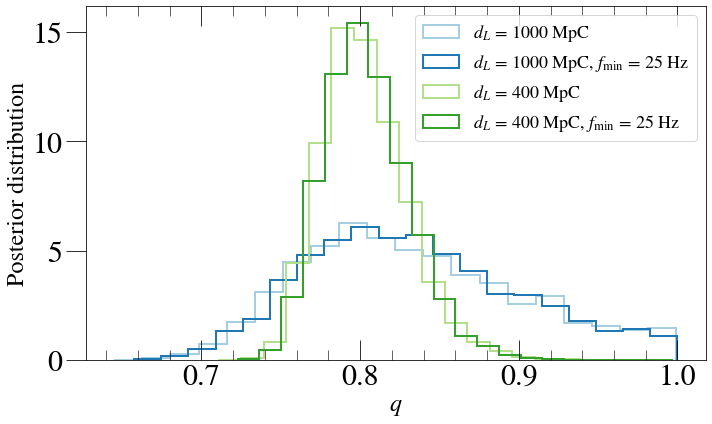

In [79]:
PlotMassRatioPosteriors()

In [89]:
p = '/home/maria.okounkova/BeyondGRAnalysis/BilbyPE/Surrogate_FramesProcs/outdir/fast_tutorial_result.json'

f = open(p)
data = json.load(f)
data.keys()
#data['log_bayes_factor'] #.keys()
#data['posterior']['content'].keys()


dict_keys(['label', 'outdir', 'sampler', 'log_evidence', 'log_evidence_err', 'log_noise_evidence', 'log_bayes_factor', 'priors', 'posterior', 'injection_parameters', 'meta_data', 'search_parameter_keys', 'fixed_parameter_keys', 'constraint_parameter_keys', 'sampling_time', 'sampler_kwargs', 'use_ratio', 'information_gain', 'log_likelihood_evaluations', 'log_prior_evaluations', 'samples', 'nested_samples', 'parameter_labels', 'parameter_labels_with_unit', 'version'])

### Old corner plot code

In [ ]:
def CornerPlot(quantities, figname):
    data_0p0, labels, truths = GetDataForMassCorner(0.0, quantities)
    data_0p1, labels, truths = GetDataForMassCorner(0.1, quantities)
    
    cs = sns.color_palette('husl', n_colors=2)
    
    dim = len(labels)
    ranges = [1.0 for d in labels]

    fig = corner.corner(data_0p0, labels=labels,
                       title_kwargs={"fontsize": 20}, label_kwargs={"fontsize": 20}, color=cs[0], 
                       show_titles=False)
    corner.corner(data_0p1, fig=fig, range = ranges, color=cs[1],
                 #truths = truths, truth_color = '#cccacb'
                 )
    
    ax_arr = fig.get_axes()
    
    ## scatter the truths
    for cc in range(1, dim):
        for rr in range(cc):
            ax_arr[cc*dim + rr].scatter([truths[rr]], [truths[cc]], color = 'black', s=200, marker='*')
            
    for rr in range(dim):
        ax_arr[rr*dim + rr].axvline(truths[rr], ls='--', lw=1.0, color='black')
    
    ## add in the legend
    x = [0.0, 0.0]
    y = [0.0, 0.0]
    l1 = ax_arr[0].plot(x, y, label=EllinKm(0.0), color = cs[0])
    l2 = ax_arr[0].plot(x, y, label=EllinKm(0.1), color = cs[1])
    legend = ax_arr[1].legend(handles=[l1[0], l2[0]], title = '$\ell$', frameon=False)
    plt.setp(legend.get_title(),fontsize=20)

    for ax in fig.get_axes():
        ax.tick_params(axis='both', labelsize=12)
    plt.tight_layout()
    plt.savefig(figname + '.pdf')
    plt.show()

In [ ]:
CornerPlot(['chi_eff', 'a1', 'a2', 'af_nonevol'], 'SpinCorner')